# Gestión de datos relacionales

Juan Sosa PhD

Email [jcsosam@unal.edu.co](mailto:jcsosam@unal.edu.co)

GitHub [https://github.com/jstats1702](https://github.com/jstats1702)

Traducción a Python: Samuel H Sánchez

Email [ssanchezgu@unal.edu.co](ssanchezgu@unal.edu.co)

GitHub [https://github.com/Samuel-col](https://github.com/Samuel-col)

In [1]:
# pip install igraph
import igraph as gr
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
%matplotlib inline

## Introducción

**Conformación**, **almacenamiento** y **gestión** de datos relacionales:

- Variables **diádicas**.
- Variables **nodales**.
- Variables **derivadas** (e.g., indicadoras de grupos).

Un **grafo** por sí solo (una colección de vértices y aristas) suele ser insuficiente para representar todos los atributos una red.

La **decoración** de un grafo corresponde a la **conjunción de vértices y aristas con otras variables** de interés (atributos).

La **teoría de grafos** es fundamental para analizar redes sociales.


## Grafos

Un **grafo** $G = (V, E)$ es una estructura que consiste de un conjunto de **vértices** (nodos) $V$ y de un conjunto de **aristas** (enlaces) $E$, donde los elementos de $E$ son parejas de la forma $e=\{u,v\}$, con $u,v\in V$. 

El **número de vértices** $|V|$ y el **número de aristas** $|E|$ se conocen como el **orden** y el **tamaño** del grafo, respectivamente.

Los **vértices** del grafo **se enumeran** con los números enteros $1,\ldots,n$ o $0,\ldots,n-1$, donde $n = |V|$.


### Grafos y digrafos

Un grafo para el que cada arista $\{u,v\}\in E$ es tal que $\{u,v\} \not\equiv \{v,u\}$, para todo $u,v\in V$ se denomina **grafo dirigido** o **digrafo**. De lo contrario se llama **grafo no dirigido** o simplemente **grafo**. 

<p align="center">
<img width="500px" src="graph_digraph.png">
</p>


## Multigrafos

Un **multigrafo** es aquel grafo que permite **múltiples aristas** entre el mismo par de vértices y aristas de un vértice a sí mismo. 

Un grafo que no es un multigrafo se denomina **grafo simple**.

Paquete [multinet](https://uu.diva-portal.org/smash/get/diva2:1577343/FULLTEXT01.pdf) en R.

<p align="center">
<img width="500px" src="multigraph.png">
</p>


### Ejemplo: red binaria no dirigida


In [2]:
# red no dirigida (definicion manual)
g = gr.Graph.Formula("0-1, 0-2, 1-2, 1-3, 2-4, 3-4, 3-5, 3-6, 4-5, 5-6")
## OJO: En python, a diferencia de R, los vértices se enumeran desde el cero.
# otra manera
# g = gr.Graph([(0,1),(0,2),(1,2),(1,3),(2,4),(3,4),(3,5),(3,6),(4,5),(5,6)])

In [3]:
# clase del objeto
type(g)

igraph.Graph

In [4]:
# identificador
g

In [5]:
# vertices
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f33670795e0>, 0, {'name': '0'}),
 igraph.Vertex(<igraph.Graph object at 0x7f33670795e0>, 1, {'name': '1'}),
 igraph.Vertex(<igraph.Graph object at 0x7f33670795e0>, 2, {'name': '2'}),
 igraph.Vertex(<igraph.Graph object at 0x7f33670795e0>, 3, {'name': '3'}),
 igraph.Vertex(<igraph.Graph object at 0x7f33670795e0>, 4, {'name': '4'}),
 igraph.Vertex(<igraph.Graph object at 0x7f33670795e0>, 5, {'name': '5'}),
 igraph.Vertex(<igraph.Graph object at 0x7f33670795e0>, 6, {'name': '6'})]

In [6]:
# Dataframe de vértices
g.get_vertex_dataframe()

,name
vertex ID,
0,0
1,1
2,2
3,3
4,4
5,5
6,6


In [7]:
# orden
g.vcount()

7

In [8]:
# aristas
list(g.es)

[igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 0, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 1, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 2, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 3, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 4, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 5, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 6, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 7, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 8, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670795e0>, 9, {})]

In [9]:
# Dataframe de aristas
g.get_edge_dataframe()

,source,target
edge ID,,
0,0,1
1,0,2
2,1,2
3,1,3
4,2,4
5,3,4
6,3,5
7,3,6
8,4,5


In [10]:
# Aristas como tuplas
g.get_edgelist()

[(0, 1),
 (0, 2),
 (1, 2),
 (1, 3),
 (2, 4),
 (3, 4),
 (3, 5),
 (3, 6),
 (4, 5),
 (5, 6)]

In [11]:
# tamaño
g.ecount()

10

In [12]:
# ponderada?
g.is_weighted()

False

In [13]:
# simple?
g.is_simple()

True

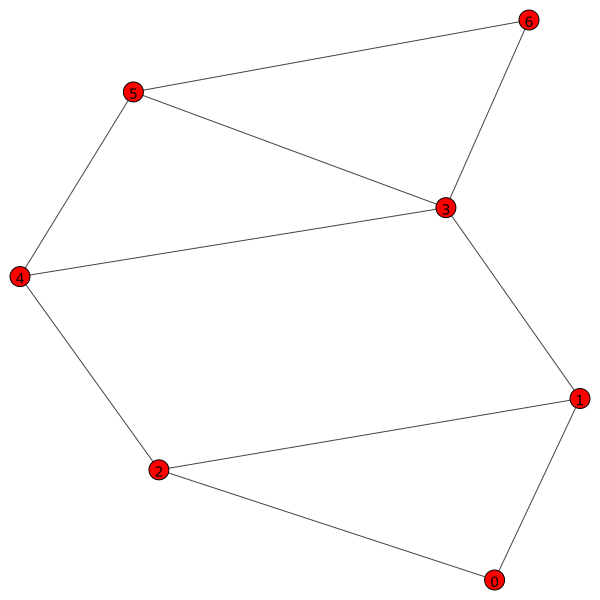

In [14]:
# visualizacion
np.random.seed(123)
g.vs['label'] = range(g.vcount()) # Establecer nombres de los vértices
gr.plot(g)

### 3.2 Ejemplo: Red ponderada no dirigida

In [15]:
# red ponderada no dirigida
wg = g.copy()
wg.es['weight'] = list(np.round(st.uniform.rvs(size = g.ecount()),3))
# pesos
wg.es['weight']

[0.696, 0.286, 0.227, 0.551, 0.719, 0.423, 0.981, 0.685, 0.481, 0.392]

In [16]:
# ponderada?
wg.is_weighted()

True

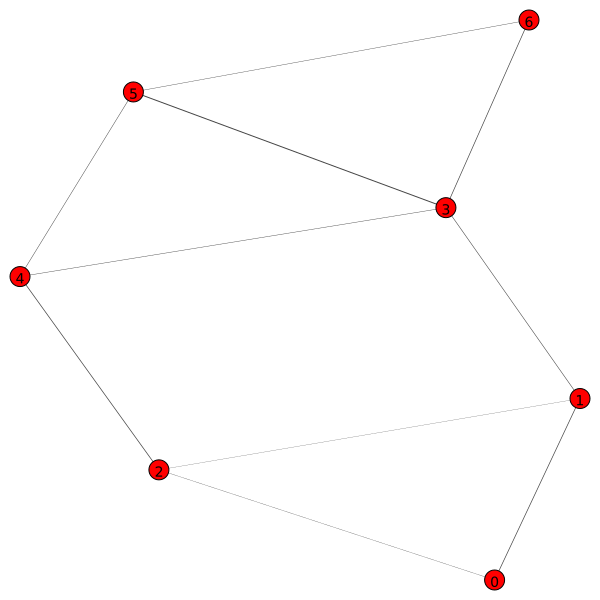

In [17]:
# visualizacion
np.random.seed(123)
g.vs['label'] = range(g.vcount()) # Establecer nombres de los vértices
gr.plot(wg,edge_width = 5*wg.es['weight'])

### 3.3 Ejemplo: Red binaria dirigida

In [18]:
# red dirigida (definicion manual)
dg = gr.Graph.Formula("1->2, 1->3, 2<->3")
# aristas
list(dg.es)

[igraph.Edge(<igraph.Graph object at 0x7f33670796d0>, 0, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670796d0>, 1, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670796d0>, 2, {}),
 igraph.Edge(<igraph.Graph object at 0x7f33670796d0>, 3, {})]

In [19]:
# Dataframe de aristas
dg.get_edge_dataframe()

,source,target
edge ID,,
0,0,1
1,0,2
2,1,2
3,2,1


In [20]:
# cambios de etiqueta
dg.vs['name'] = ['Juan','Maria','Pedro']
# agregar atributos
dg.vs['genero'] = ['M','F','M']
# aristas
list(dg.vs)

[igraph.Vertex(<igraph.Graph object at 0x7f33670796d0>, 0, {'name': 'Juan', 'genero': 'M'}),
 igraph.Vertex(<igraph.Graph object at 0x7f33670796d0>, 1, {'name': 'Maria', 'genero': 'F'}),
 igraph.Vertex(<igraph.Graph object at 0x7f33670796d0>, 2, {'name': 'Pedro', 'genero': 'M'})]

In [21]:
# Dataframe de aristas
print(dg.get_edge_dataframe())
print('-'*30)
# Dataframe de vértices
print(dg.get_vertex_dataframe())

         source  target
edge ID                
0             0       1
1             0       2
2             1       2
3             2       1
------------------------------
            name genero
vertex ID              
0           Juan      M
1          Maria      F
2          Pedro      M


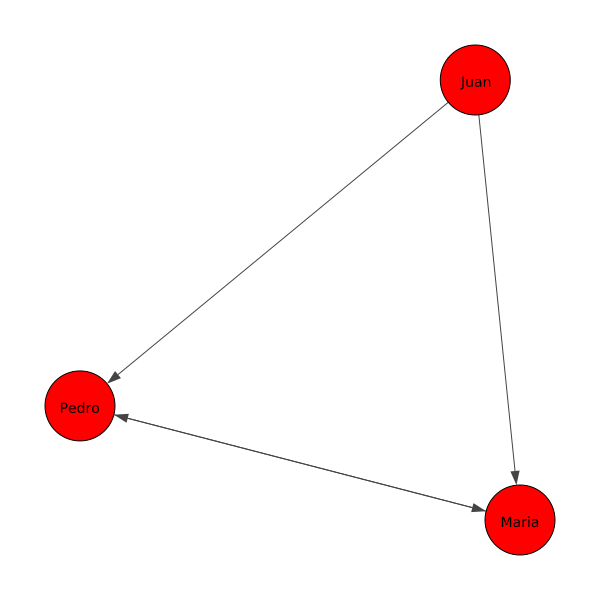

In [22]:
# Visualización
np.random.seed(42)
dg.vs['label'] = dg.vs['name'] 
gr.plot(dg,margin = 80,vertex_size = 70,edge_curved=False)

### 3.4 Ejemplo: multigrafo

In [23]:
# multigrafo
mg = g.copy()
mg.add_edges([(0,0),(0,1),(0,2)])
mg.get_edge_dataframe()

,source,target
edge ID,,
0,0,1
1,0,2
2,1,2
3,1,3
4,2,4
5,3,4
6,3,5
7,3,6
8,4,5


In [24]:
# simple?
mg.is_simple()

False

In [25]:
# simplificacion a grafo ponderado
mg.es['weight'] = 1
wg2 = mg.copy()
wg2 = wg2.simplify(combine_edges = 'sum')
wg2.get_edge_dataframe()

,source,target,weight
edge ID,,,
0,0,1,2.0
1,0,2,2.0
2,1,2,1.0
3,1,3,1.0
4,2,4,1.0
5,3,4,1.0
6,3,5,1.0
7,3,6,1.0
8,4,5,1.0


## Estructuras de datos

Generalmente los grafos **no se definen manualmente** ya que en la práctica la mayoría de las redes son **grandes**.

Los datos para construir un grafo comúnmente se almacenarán en un **archivo de datos** (.txt, .csc, .dat, etc.). 

### Matriz de adyacencia

La **matriz de adyacencia** o **socio-matriz** $\mathbf{Y} = [y_{i,j}]$ asociada con un grafo $G=(V,E)$ de orden $n$ es una **matriz binaria** de $n\times n$ tal que $y_{i,j} = 1$ si $\{i,j\} \in E$ y $y_{i,j} = 0$ en otro caso.

La **diagonal principal** de una matriz de adyacencia está llena de **ceros estructurales**.

La matriz de adyacencia de un **grafo no dirigido** es **necesariamente simétrica**. 

La matriz de adyacencia de un **grafo dirigido**    es **posiblemente asimétrica**.


### Ejemplo: red binaria no dirigida

In [26]:
# red no dirigida (definicion manual)
g = gr.Graph.Formula("0-1, 0-2, 1-2, 1-3, 2-4, 3-4, 3-5, 3-6, 4-5, 5-6")

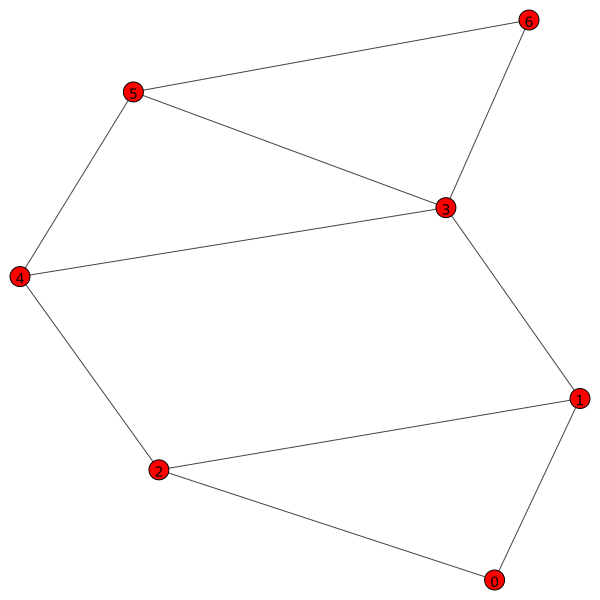

In [27]:
# visualizacion
np.random.seed(42)
g.vs['label'] = range(g.vcount())
gr.plot(g)

In [28]:
# matriz de adjacencia dispersa (sparse)
A = g.get_adjacency_sparse()
type(A)

scipy.sparse.csr.csr_matrix

In [29]:
A

<7x7 sparse matrix of type '<class 'numpy.int64'>'
	with 20 stored elements in Compressed Sparse Row format>

In [30]:
# matriz de adyacencia
Y = g.get_adjacency()
type(Y)

igraph.datatypes.Matrix

In [31]:
# convertir a matriz de numpy
Y_np = np.array(Y.data)
type(Y_np)

numpy.ndarray

In [32]:
# simetrica?
(Y_np == Y_np.T).all()

True

In [33]:
Y_np

array([[0, 1, 1, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 1],
       [0, 0, 1, 1, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 0]])

In [34]:
# version vectorizada completa
# NOTA: python asigna índices recorriendo la submatriz inferior POR FILAS, por lo tanto debemos modificar dichos índices.
ltri_i,ltri_j = np.tril_indices(Y_np.shape[0],k=-1) # k = -1 para que tome los elementos bajo la diagonal principal
y = Y_np[np.flip(6-ltri_i),np.flip(6-ltri_j)]
type(y)

numpy.ndarray

In [35]:
len(y)

21

In [36]:
y

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [37]:
# version vectorizada indexada
yy, = np.where(y == 1)
type(yy)

numpy.ndarray

In [38]:
yy

array([ 0,  1,  6,  7, 12, 15, 16, 17, 18, 20])

### Matriz de aristas

Una **matriz de aristas** es un **arreglo de dos columnas** conformado por todos los **pares de vértices** que están **unidos** por una arista.

### Ejemplo: red binaria no dirigida (cont.)


In [39]:
# matriz de aristas
n = Y_np.shape[0]
A = []
for i in range(n-1):
    for j in range(i+1,n):
        if Y[i,j] == 1: # Podemos usar Y o Y_np
            A.append([i,j])
A = np.array(A)
type(A)

numpy.ndarray

In [40]:
A

array([[0, 1],
       [0, 2],
       [1, 2],
       [1, 3],
       [2, 4],
       [3, 4],
       [3, 5],
       [3, 6],
       [4, 5],
       [5, 6]])

In [41]:
# generar dataframe
A_df = g.get_edge_dataframe()
A_df

,source,target
edge ID,,
0,0,1
1,0,2
2,1,2
3,1,3
4,2,4
5,3,4
6,3,5
7,3,6
8,4,5


### Ejemplo: Trabajo colaborativo

Red de **relaciones de trabajo colaborativo** entre los miembros de una firma de abogados (SG&R). 

Estos datos fueron recolectados para **estudiar la cooperación** entre los actores de una organización.

$y_{i,j} = 1$ si los miembros $i$ y $j$ **trabajaron juntos** en al menos un caso y $y_{i,j} = 0$ en otro caso.

Una descripción completa de los datos se puede encontrar [aquí](https://www.stats.ox.ac.uk/~snijders/siena/Lazega_lawyers_data.htm).

Disponible en el paquete `sand` de R.

Lazega, E. (2001). **The collegial phenomenon: The social mechanisms of cooperation among peers in a corporate law partnership**. Oxford University Press on Demand.


In [42]:
 # Datos
# * descargue el .zip del link anterior
# * extraiga la carpeta dentro de la carpeta en la que está este jupiter notebook
# OJO: El nombre de la carpeta debe ser LazegaLawyers. De lo contrario, modifique adecuadamente la siguiente línea de código
lazega_adj = np.genfromtxt('LazegaLawyers/ELwork36.dat', delimiter= ' ')
# datos
type(lazega_adj) # es la matriz de adyacencia

numpy.ndarray

In [43]:
# matriz de adyacencia
lazega_adj

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
lazega_attr_np = np.genfromtxt('LazegaLawyers/ELattr.dat', delimiter= ' ')

In [45]:
# Dataframe de atributos
lazega_attr = pd.DataFrame(data = lazega_attr_np, columns = ['Seniority', 'Status', 'Gender', 'Office', 'Years', 'Age', 'Practice', 'School'])
lazega_attr['Name'] = ['V'+str(i) for i in range(lazega_attr.shape[0])]
type(lazega_attr)

pandas.core.frame.DataFrame

In [46]:
lazega_attr = lazega_attr[:31]
lazega_attr.head()

,Seniority,Status,Gender,Office,Years,Age,Practice,School,Name
0,1.0,1.0,1.0,1.0,31.0,64.0,1.0,1.0,V0
1,2.0,1.0,1.0,1.0,32.0,62.0,2.0,1.0,V1
2,3.0,1.0,1.0,2.0,13.0,67.0,1.0,1.0,V2
3,4.0,1.0,1.0,1.0,31.0,59.0,2.0,3.0,V3
4,5.0,1.0,1.0,2.0,31.0,59.0,1.0,2.0,V4


In [47]:
# grafo
g_lazega = gr.Graph.Adjacency(lazega_adj,mode = 'undirected')
# atributos
for j in range(lazega_attr.shape[1]):
    attr_name = lazega_attr.columns[j]
    g_lazega.vs[attr_name] = lazega_attr[attr_name]
# ver también:
# gr.Graph.Read_Adjacency('LazegaLawyers/ELwork36.dat',sep = ' ')
# gr.Graph.DataFrame (Con esta opción los atributos se pueden pasar como un argumento más)
# gr.Graph.DictList
# gr.Graph.from_graph_tool
# gr.Graph.from_networkx
# gr.Graph.Incidence
# gr.Graph.Read
# gr.Graph.Read_GraphMLz
# gr.Graph.Read_Pickle
# gr.Graph.Read_Picklez
# gr.Graph.TupleList
# gr.Graph.Weighted_Adjacency

In [48]:
# simple?
g_lazega.is_simple()

True

In [49]:
# ponderado?
g_lazega.is_weighted()

False

In [50]:
# orden
g_lazega.vcount()

36

In [51]:
# tamaño
g_lazega.ecount()

115

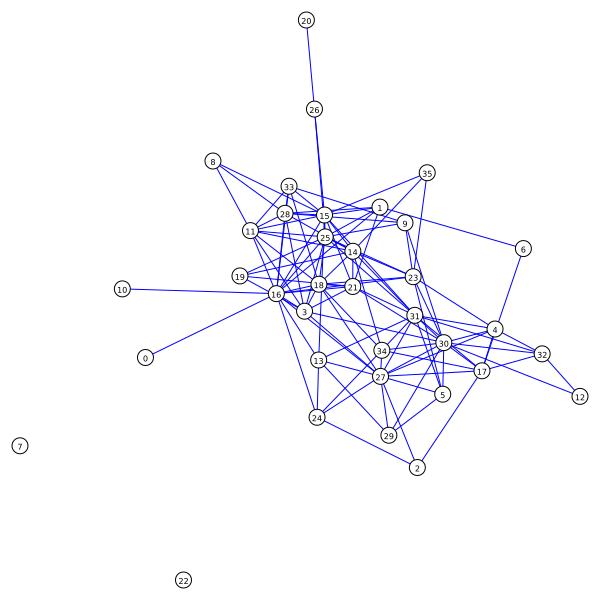

In [52]:
decorations = {
    'vertex_label':range(g_lazega.vcount()),
    'vertex_color':'white',
    'vertex_label_size':8,
    'vertex_size':16,
    'edge_color':'blue'
}
gr.plot(g_lazega,**decorations)

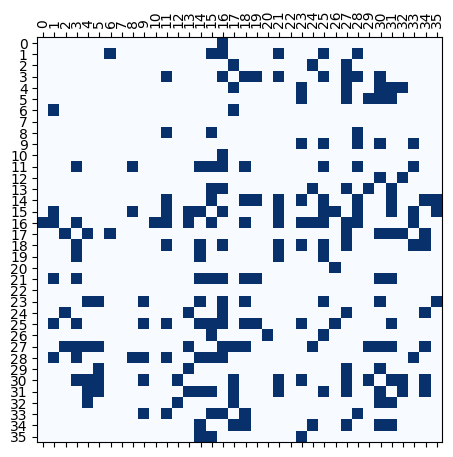

In [53]:
f = plt.figure(figsize = (6.5,4.5), dpi = 100)
ax = f.add_axes([0.1,0.1,0.9,0.9])
ax.matshow(lazega_adj,cmap = 'Blues')
ax.set_xticks(range(g_lazega.vcount()))
ax.set_yticks(range(g_lazega.vcount()))
plt.xticks(rotation=90)
plt.show()

## Referencias

<p align="center">
<img width="400px" src="01_cover_KC.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_Luke.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_Menczer.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_AK.jpg">
</p>

<p align="center">
<img width="400px" src="01_cover_Newman.jpg">
</p>